In [607]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [608]:
df_new=pd.read_csv('forestfires (2).csv')

In [609]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [610]:
df_new

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


### As the month and data are already converted to categorical columns we can drop them

In [611]:
df_new.drop(["month","day"],axis=1,inplace =True)

In [612]:
df_new.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### from the given data we will consider the numeric columns and do EDA on them first. That is, chech outliers correlation and other

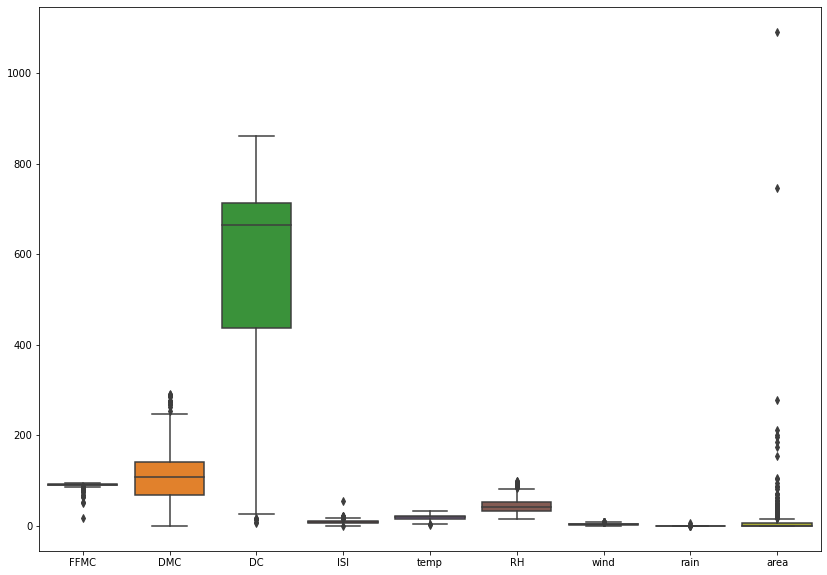

In [613]:
temp=df_new[['FFMC',	'DMC'	,'DC',	'ISI',	'temp',	'RH',	'wind',	'rain',	'area'	]]
plt.figure(figsize=[14,10])
sns.boxplot(temp)
plt.show()

In [614]:
temp.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## In the Above box plot we can se there are some outliers especially area has very big outlier
### We can use the IQR and check for outliers. We will be using the for loop to find the index of the ouliers

#### FFMC

In [615]:
q75=df_new['FFMC'].quantile(0.75)
q25=df_new['FFMC'].quantile(0.25)
iqr=q75-q25
upper=q75+(1.5*iqr)
lower=q25-(1.5*iqr)


In [616]:
df= df_new[(df_new['FFMC']<upper)&(df_new['FFMC']>lower)]

<Axes: >

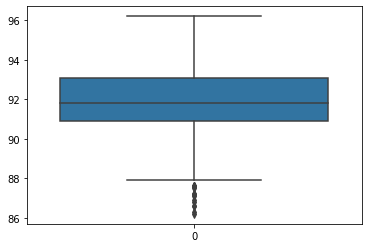

In [617]:
sns.boxplot(df['FFMC'])

#### DMC

In [618]:
q75_1=df_new['DMC'].quantile(0.75)
q25_1=df_new['DMC'].quantile(0.25)
iqr_1=q75_1-q25_1
upper_1=q75_1+(1.5*iqr_1)
lower_1=q25_1-(1.5*iqr_1)

In [619]:
df_1= df[(df['DMC']<upper_1)&(df['DMC']>lower_1)]

In [620]:
df_1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.0,447.000000,447.0,447.000000,447.000000,447.000000,447.000000,447.0,447.000000,447.000000
mean,91.955481,114.329978,569.874273,9.838479,19.780089,42.742729,3.905593,0.025056,13.517002,0.161074,0.143177,0.161074,0.176734,0.120805,0.123043,0.114094,0.011186,0.387025,0.0,0.008949,0.0,0.064877,0.035794,0.111857,0.002237,0.0,0.029083,0.348993
std,1.922072,52.694666,225.720909,4.266981,5.069024,15.148844,1.703581,0.318205,68.102121,0.368011,0.350645,0.368011,0.381871,0.326266,0.328854,0.318282,0.105287,0.487615,0.0,0.094278,0.0,0.246585,0.185985,0.315543,0.047298,0.0,0.168227,0.477186
min,86.200000,6.600000,18.700000,3.200000,5.100000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,91.000000,85.100000,525.150000,7.100000,16.700000,32.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,91.900000,111.700000,666.700000,8.900000,19.800000,40.000000,4.000000,0.000000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,93.100000,142.400000,713.900000,11.950000,23.200000,51.000000,4.900000,0.000000,6.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,96.200000,248.400000,822.800000,56.100000,33.300000,99.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


<Axes: >

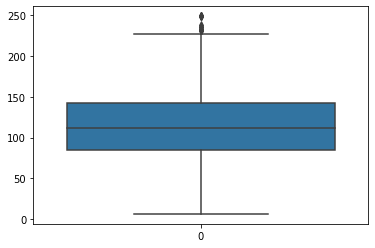

In [621]:
sns.boxplot(df_1['DMC'])

#### DC

In [622]:
q75_2=df_new['DC'].quantile(0.75)
q25_2=df_new['DC'].quantile(0.25)
iqr_2=q75_2-q25_2
upper_2=q75_2+(1.5*iqr_2)
lower_2=q25_2-(1.5*iqr_2)

In [623]:
df_2= df_1[(df_1['DC']<upper_2)&(df_1['DC']>lower_2)]

In [624]:
df_2.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.0,446.000000,446.0,446.000000,446.000000,446.000000,446.000000,446.0,446.000000,446.000000
mean,91.966816,114.571525,571.110090,9.853363,19.804709,42.760090,3.907399,0.025112,13.544843,0.161435,0.143498,0.161435,0.177130,0.121076,0.123318,0.112108,0.011211,0.387892,0.0,0.006726,0.0,0.065022,0.035874,0.112108,0.002242,0.0,0.029148,0.349776
std,1.909214,52.505513,224.455366,4.260139,5.047892,15.161404,1.705066,0.318560,68.176050,0.368345,0.350973,0.368345,0.382207,0.326582,0.329172,0.315853,0.105404,0.487817,0.0,0.081830,0.0,0.246842,0.186186,0.315853,0.047351,0.0,0.168410,0.477435
min,86.200000,13.200000,25.600000,3.700000,5.100000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,91.000000,85.100000,529.800000,7.100000,16.800000,32.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,91.900000,111.700000,666.700000,8.900000,19.800000,40.000000,4.000000,0.000000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,93.100000,142.400000,713.900000,11.975000,23.200000,51.000000,4.900000,0.000000,6.085000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,96.200000,248.400000,822.800000,56.100000,33.300000,99.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


#### ISI

In [625]:
q75_3=df_new['ISI'].quantile(0.75)
q25_3=df_new['ISI'].quantile(0.25)
iqr_3=q75_3-q25_3
upper_3=q75_3+(1.5*iqr_3)
lower_3=q25_3-(1.5*iqr_3)

In [626]:
df_3= df_2[(df_2['ISI']<upper_3)&(df_2['ISI']>lower_3)]

In [627]:
df_3.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.0,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.0,424.000000,424.000000
mean,91.844104,113.447642,569.195519,9.284198,19.637736,42.846698,3.858019,0.026415,13.775142,0.169811,0.148585,0.158019,0.183962,0.117925,0.120283,0.101415,0.011792,0.370283,0.0,0.007075,0.0,0.068396,0.033019,0.117925,0.002358,0.0,0.030660,0.358491
std,1.870642,52.835601,228.530130,3.048685,4.959881,15.046896,1.686571,0.326686,69.840173,0.375911,0.356099,0.365190,0.387911,0.322900,0.325676,0.302234,0.108078,0.483451,0.0,0.083917,0.0,0.252723,0.178897,0.322900,0.048564,0.0,0.172599,0.480124
min,86.200000,13.200000,25.600000,3.700000,5.500000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,91.000000,85.100000,510.875000,7.100000,16.600000,32.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,91.800000,111.200000,668.000000,8.600000,19.600000,40.000000,3.600000,0.000000,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,92.900000,142.400000,715.100000,11.000000,22.900000,51.000000,4.900000,0.000000,5.987500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,96.200000,248.400000,822.800000,17.000000,33.300000,99.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


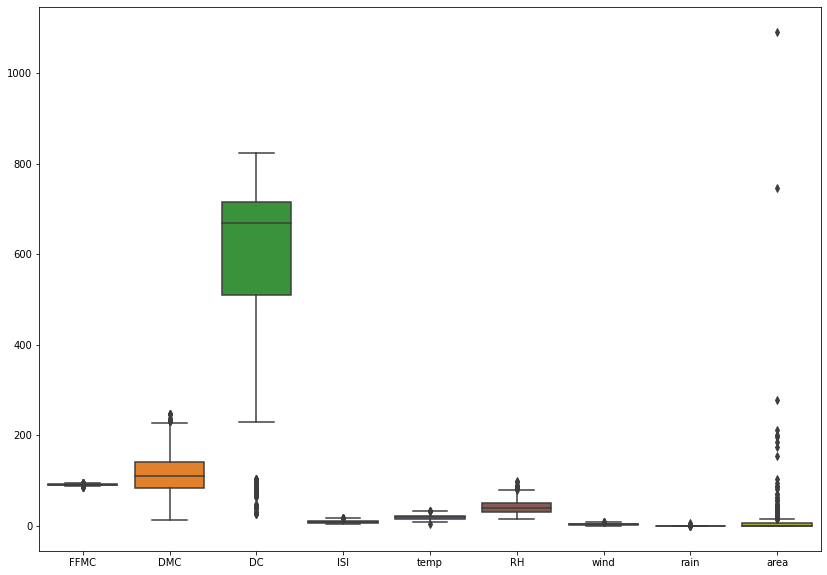

In [628]:
temp_1=temp=df_3[['FFMC',	'DMC'	,'DC',	'ISI',	'temp',	'RH',	'wind',	'rain',	'area'	]]
plt.figure(figsize=[14,10])
sns.boxplot(temp_1)
plt.show()

#### Area

In [629]:
q75_8=df_new['area'].quantile(0.75)
q25_8=df_new['area'].quantile(0.25)
iqr_8=q75_8-q25_8
upper_8=q75_8+1.5*iqr_8
lower_8=q25_8-1.5*iqr_8

In [630]:
data= df_3[(df_3['area']<upper_8)&(df_3['area']>lower_8)]

In [631]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.0,374.000000,374.000000,374.000000,374.0,374.0,374.000000,374.000000
mean,91.843583,112.862834,568.180214,9.333422,19.544385,43.205882,3.840374,0.029947,2.119305,0.171123,0.147059,0.149733,0.184492,0.125668,0.120321,0.101604,0.010695,0.385027,0.0,0.008021,0.0,0.069519,0.034759,0.120321,0.0,0.0,0.029412,0.342246
std,1.868807,52.585027,228.459678,3.092919,4.943971,15.236927,1.702955,0.347741,3.577385,0.377121,0.354639,0.357287,0.388404,0.331919,0.325772,0.302532,0.103001,0.487253,0.0,0.089322,0.0,0.254675,0.183415,0.325772,0.0,0.0,0.169184,0.475097
min,86.200000,13.200000,25.600000,3.700000,5.500000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,91.000000,85.100000,513.300000,7.100000,16.450000,33.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,91.800000,108.400000,665.600000,8.800000,19.650000,40.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,92.900000,142.400000,715.100000,10.775000,22.875000,51.000000,4.900000,0.000000,2.747500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000
max,96.200000,248.400000,822.800000,17.000000,32.600000,99.000000,9.400000,6.400000,16.330000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


In [632]:
data.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [633]:
data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

### We have removed many outliers.
More can be removed but data will be reduced significantly and data might under fit the model. 
We have removed very big outliers and can see the difference in the below box plot

Data before outlier removal


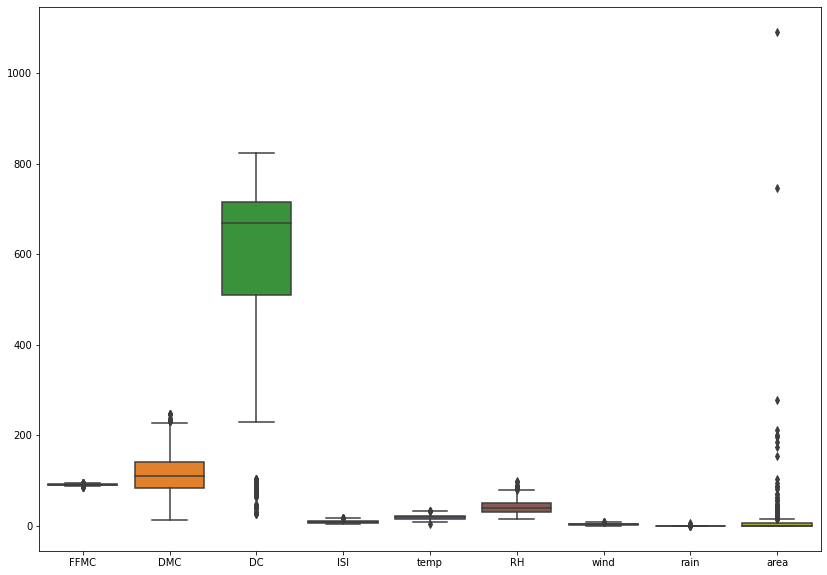

Data after outlier removal


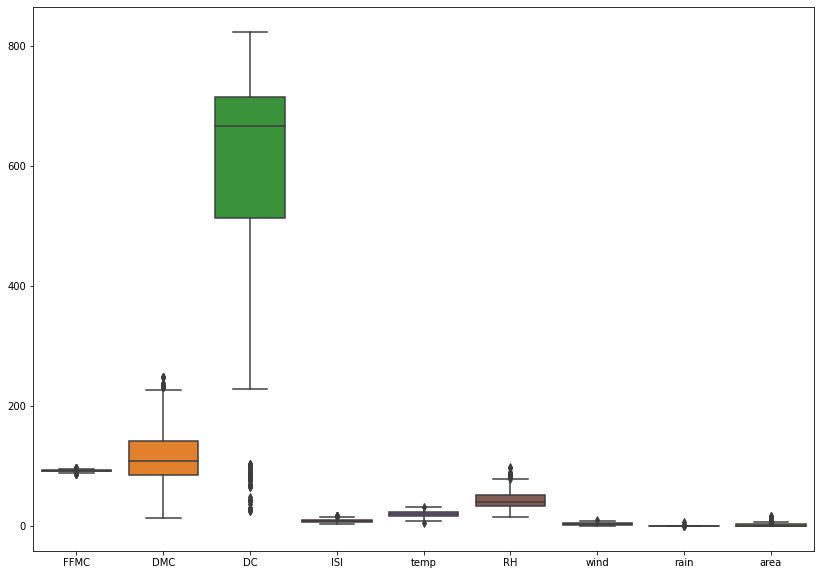

In [652]:
temp_2=data[['FFMC',	'DMC'	,'DC',	'ISI',	'temp',	'RH',	'wind',	'rain',	'area'	]]
plt.figure(figsize=[14,10])
print('Data before outlier removal')
sns.boxplot(temp)
plt.show()
print('Data after outlier removal')
plt.figure(figsize=[14,10])
sns.boxplot(temp_2)
plt.show()

In [635]:
x=data.iloc[:,0:28]
y=data.iloc[:,28]

## EDA

In [669]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [637]:
scl=MinMaxScaler()
a=scl.fit_transform(x)

In [670]:
le=LabelEncoder()
b= le.fit_transform(y)

In [671]:
x_train,x_test,y_train,y_test= train_test_split(a,b,test_size = 0.7)

In [672]:
x_train

array([[0.86      , 0.40433673, 0.77960361, ..., 0.        , 0.        ,
        0.        ],
       [0.38      , 0.1619898 , 0.33956347, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.92644558, 0.86490216, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.63      , 0.31802721, 0.84420472, ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.44217687, 0.69681385, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.92644558, 0.86490216, ..., 0.        , 0.        ,
        0.        ]])

In [673]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

## Models
We will be running 3 models of SVC


1.   Linear SVC
2.   Polynomial SVC
3.   Radial SVC



## Linear

In [674]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

### Model Evaluation

In [675]:
pred= model_linear.predict(x_test)

In [701]:
conf_linear=confusion_matrix(y_test,pred)
print(conf_linear)
print('Acc of model=',accuracy_score(y_test,pred)*100)

[[ 29   9]
 [  1 223]]
Acc of model= 96.18320610687023


In [689]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,auc,classification_report,roc_curve

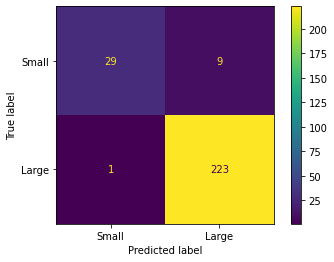

In [690]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_linear, display_labels = ['Small', 'Large'])

cm_display.plot()
plt.show()

In [691]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85        38
           1       0.96      1.00      0.98       224

    accuracy                           0.96       262
   macro avg       0.96      0.88      0.92       262
weighted avg       0.96      0.96      0.96       262



Text(0, 0.5, 'True Positive Rate')

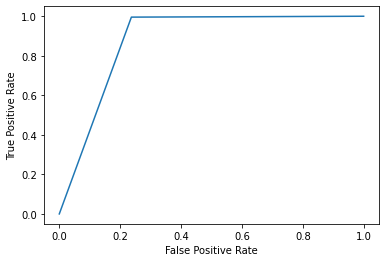

In [680]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [692]:
roc_auc_score(y_test,pred)

0.8793468045112782

## Polynomial 

In [681]:
model_poly=SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

### Model Evaluation

In [682]:
pred_poly=model_poly.predict(x_test)

In [693]:
conf_poly=confusion_matrix(y_test,pred_poly)
print(conf_linear)
print('Acc of model=',accuracy_score(y_test,pred_poly)*100)

[[ 29   9]
 [  1 223]]
Acc of model= 92.36641221374046


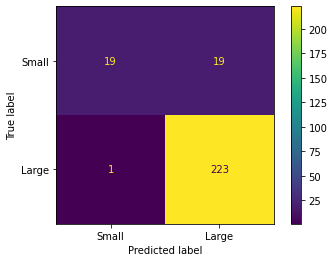

In [694]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_poly, display_labels = ['Small', 'Large'])

cm_display.plot()
plt.show()

In [695]:
print(classification_report(y_test,pred_poly))

              precision    recall  f1-score   support

           0       0.95      0.50      0.66        38
           1       0.92      1.00      0.96       224

    accuracy                           0.92       262
   macro avg       0.94      0.75      0.81       262
weighted avg       0.93      0.92      0.91       262



Text(0, 0.5, 'True Positive Rate')

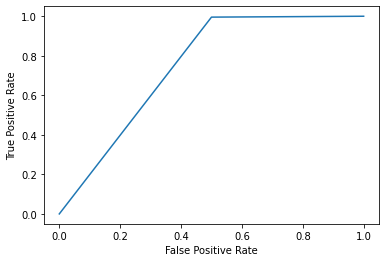

In [696]:
fpr, tpr, thresholds = roc_curve(y_test, pred_poly)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [698]:
roc_auc_score(y_test,pred_poly)

0.7477678571428572

## RadiaL

In [684]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

### Model Evaluation

In [685]:
pred_rbf=model_rbf.predict(x_test)

In [703]:
con_rbf=confusion_matrix(y_test,pred_rbf)
print(con_rbf)
print('Acc of model=',accuracy_score(y_test,pred_rbf)*100)

[[  8  30]
 [  0 224]]
Acc of model= 88.54961832061069


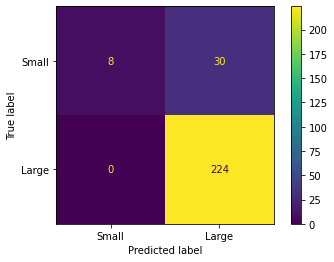

In [705]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_rbf, display_labels = ['Small', 'Large'])

cm_display.plot()
plt.show()

In [706]:
print(classification_report(y_test,pred_rbf))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        38
           1       0.88      1.00      0.94       224

    accuracy                           0.89       262
   macro avg       0.94      0.61      0.64       262
weighted avg       0.90      0.89      0.85       262



Text(0, 0.5, 'True Positive Rate')

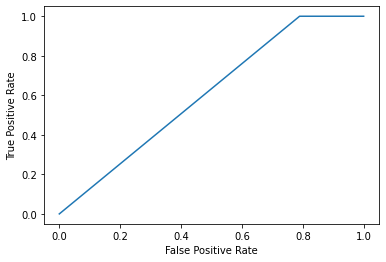

In [707]:
fpr, tpr, thresholds = roc_curve(y_test, pred_rbf)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [708]:
roc_auc_score(y_test,pred_rbf)

0.6052631578947368

## Conclusion:
1. The data had lot of outliers, hence we used IQR to remove the outliers 
2. The cleaned data is processed in 3 models of svm (Linear, Polynomial, Radial) 
3. Comparing the Accuracy, F1 scores, AUC-ROC curve we can easily conclude that the linear model fits the best for the data with the highest and best values of Accuracy,AUC-ROC 